* `HYDRO_MESHLESS_FINITE_MASS / HYDRO_MESHLESS_FINITE_VOLUME`
* `BOX_SPATIAL_DIMENSION=1`
* `BOX_PERIODIC`
* `BOX_REFLECT_X`
* `SELFGRAVITY_OFF`
* `EOS_GAMMA=(1.4)`
* `INPUT_IN_DOUBLEPRECISION`
* `OUTPUT_IN_DOUBLEPRECISION`

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import os

import h5py as h5

In [2]:
# MFM, MFV results for N = 100, 200, 400.
basedir_mfm_N100 = '/home/nina/Downloads/scp_transfers/output_sod_shock_N100_mfm/'
basedir_mfv_N100 = '/home/nina/Downloads/scp_transfers/output_sod_shock_N100_mfv/'

basedir_mfm_N200 = '/home/nina/Downloads/scp_transfers/output_sod_shock_N200_mfm/'
basedir_mfv_N200 = '/home/nina/Downloads/scp_transfers/output_sod_shock_N200_mfv/'

basedir_mfm_N400 = '/home/nina/Downloads/scp_transfers/output_sod_shock_N400_mfm/'
basedir_mfv_N400 = '/home/nina/Downloads/scp_transfers/output_sod_shock_N400_mfv/'

In [3]:
def get_snapshot_data(basedir, i):
    
    gamma = 1.4
    
    fname = os.path.join(basedir, 'snapshot_{0:03d}.hdf5'.format(i))
    
    f = h5.File(fname, 'r')
    
    header = f['Header']
    data   = f['PartType0']
    
    t = header.attrs['Time']

    x = data['Coordinates'][:, 0]
    rho = data['Density'][:]
    e = data['InternalEnergy'][:]
    v = data['Velocities'][:, 0]
    
    p = (gamma - 1.0) * np.multiply(e, rho)
    
    return x, v, rho, p, e, t

def make_plots(data_mfm, data_mfv, data_solver, data_true, N):
    
    xm = data_mfm[:, 0]; rhom = data_mfm[:, 1]; vm = data_mfm[:, 2]; pm = data_mfm[:, 3]
    em = data_mfm[:, 4]; tm = data_mfm[0, 5]
    
    xv = data_mfv[:, 0]; rhov = data_mfv[:, 1]; vv = data_mfv[:, 2]; pv = data_mfv[:, 3]
    ev = data_mfv[:, 4]; tv = data_mfv[0, 5]
    
    xs = data_solver[:, 0]; vs = data_solver[:, 1]; rhos = data_solver[:, 2]; ps = data_solver[:, 3]
    es = data_solver[:, 4]
    
    xt = data_true[:, 0]; vt = data_true[:, 1]; rhot = data_true[:, 2]; pt = data_true[:, 3]
    et = data_true[:, 4]
    
    mpl.rcParams['xtick.labelsize'] = 12.0
    mpl.rcParams['ytick.labelsize'] = 12.0
    
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    
    axs[0, 0].scatter(xm, rhom, color='r', s=25.0, marker='*', label='MFM')
    axs[0, 1].scatter(xm, vm, color='r', s=25.0, marker='*',label='MFM')
    axs[1, 0].scatter(xm, pm, color='r', s=25.0, marker='*',label='MFM')
    axs[1, 1].scatter(xm, em, color='r', s=25.0, marker='*',label='MFM')
    
    axs[0, 0].scatter(xv, rhov, color='b', marker='+', s=35.0, label='MFV')
    axs[0, 1].scatter(xv, vv, color='b', marker='+', s=35.0, label='MFV')
    axs[1, 0].scatter(xv, pv, color='b', marker='+', s=35.0, label='MFV')
    axs[1, 1].scatter(xv, ev, color='b', marker='+', s=35.0, label='MFV')
    
    if tm != 0.0:
        axs[0, 0].plot(xt, rhot, color='grey', linestyle='--', linewidth=2.0, label='exact')
        axs[0, 1].plot(xt, vt, color='grey', linestyle='--', linewidth=2.0, label='exact')
        axs[1, 0].plot(xt, pt, color='grey', linestyle='--', linewidth=2.0, label='exact')
        axs[1, 1].plot(xt, et, color='grey', linestyle='--', linewidth=2.0, label='exact')
    
        axs[0, 0].plot(xs, rhos, color='black', linestyle='-', linewidth=2.0, label='HW 2')
        axs[0, 1].plot(xs, vs, color='black', linestyle='-', linewidth=2.0, label='HW 2')
        axs[1, 0].plot(xs, ps, color='black', linestyle='-', linewidth=2.0, label='HW 2')
        axs[1, 1].plot(xs, es, color='black', linestyle='-', linewidth=2.0, label='HW 2')
    
    axs[0, 0].set_xlabel(r'$x$', fontsize=15.0)
    axs[0, 0].set_ylabel(r'$\rho$', fontsize=15.0)
    axs[0, 0].set_title('Density', fontsize=15.0)
    axs[0, 0].legend(fontsize=12.0)
    
    axs[0, 1].set_xlabel(r'$x$', fontsize=15.0)
    axs[0, 1].set_ylabel(r'$v$', fontsize=15.0)
    axs[0, 1].set_title('Velocity', fontsize=15.0)
    axs[0, 1].legend(fontsize=12.0)
    
    axs[1, 0].set_xlabel(r'$x$', fontsize=15.0)
    axs[1, 0].set_ylabel(r'$P$', fontsize=15.0)
    axs[1, 0].set_title('Pressure', fontsize=15.0)
    axs[1, 0].legend(fontsize=12.0)
    
    axs[1, 1].set_xlabel(r'$x$', fontsize=15.0)
    axs[1, 1].set_ylabel(r'$e$', fontsize=15.0)
    axs[1, 1].set_title('Specific energy', fontsize=15.0)
    axs[1, 1].set_ylim(ymin=1.5, ymax=3.0)
    axs[1, 1].legend(fontsize=12.0)
    
    axs[0, 0].grid(visible=True); axs[0, 1].grid(visible=True)
    axs[1, 0].grid(visible=True); axs[1, 1].grid(visible=True)
    
    axs[0, 0].annotate('t = {0:.3f} s'.format(tm), xy=(0.8, 0.85), fontsize='xx-large')
    axs[0, 0].annotate('N = {0:d}'.format(N), xy=(0.8, 0.75), fontsize='xx-large')
    
    plt.tight_layout()
    plt.show()
    
    return

In [4]:
# Solutions from HW 2.

fname_true = '/home/nina/jupyter-workspace/ast381/sod_shock_true.txt'
fname_N100 = '/home/nina/jupyter-workspace/ast381/sod_shock_N100.txt'
fname_N200 = '/home/nina/jupyter-workspace/ast381/sod_shock_N200.txt'
fname_N400 = '/home/nina/jupyter-workspace/ast381/sod_shock_N400.txt'

data_true = np.loadtxt(fname_true, dtype=float)
data_N100 = np.loadtxt(fname_N100, dtype=float)
data_N200 = np.loadtxt(fname_N200, dtype=float)
data_N400 = np.loadtxt(fname_N400, dtype=float)

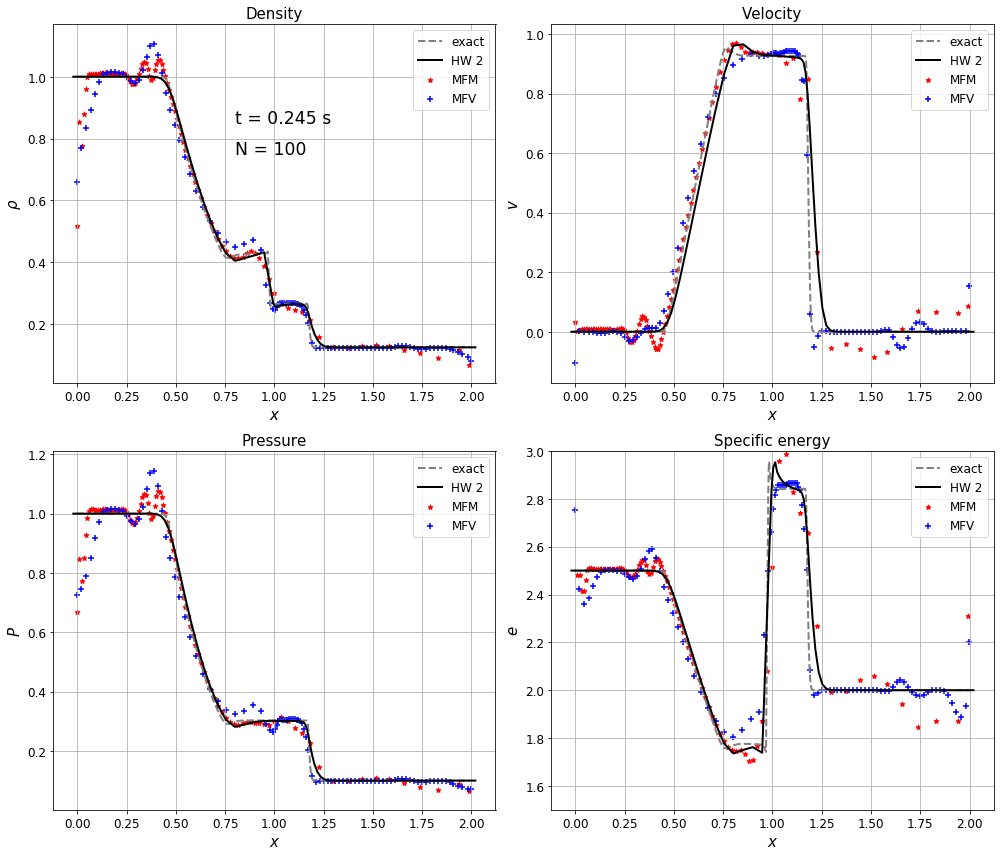

In [5]:
N = 100
i = 49

# MFM at t = 0.245 s.
x, v, rho, p, e, t = get_snapshot_data(basedir_mfm_N100, i)
data_mfm = np.zeros((len(x), 6))
data_mfm[:, 0] = x; data_mfm[:, 1] = rho; data_mfm[:, 2] = v; data_mfm[:, 3] = p
data_mfm[:, 4] = e; data_mfm[0, 5] = t

# MFV at t = 0.245 s.
x, v, rho, p, e, t = get_snapshot_data(basedir_mfv_N100, i)
data_mfv = np.zeros((len(x), 6))
data_mfv[:, 0] = x; data_mfv[:, 1] = rho; data_mfv[:, 2] = v; data_mfv[:, 3] = p
data_mfv[:, 4] = e; data_mfv[0, 5] = t

make_plots(data_mfm, data_mfv, data_N100, data_true, N)

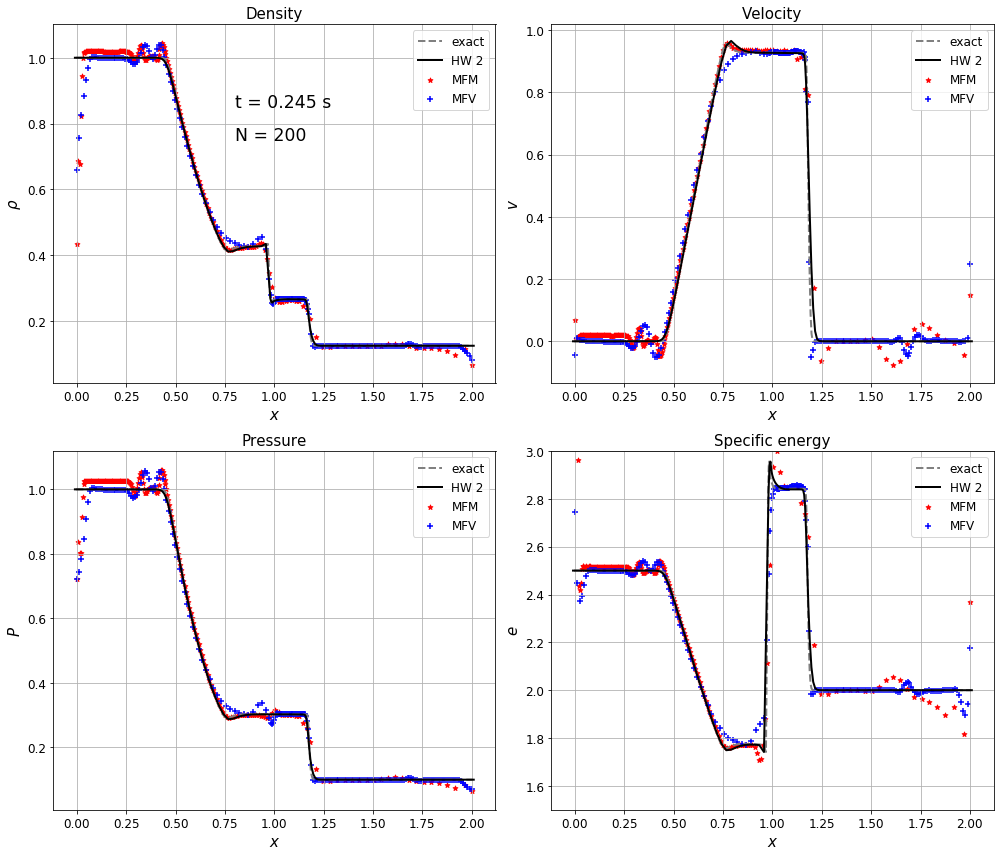

In [6]:
N = 200
i = 49

# MFM at t = 0.245 s.
x, v, rho, p, e, t = get_snapshot_data(basedir_mfm_N200, i)
data_mfm = np.zeros((len(x), 6))
data_mfm[:, 0] = x; data_mfm[:, 1] = rho; data_mfm[:, 2] = v; data_mfm[:, 3] = p
data_mfm[:, 4] = e; data_mfm[0, 5] = t

# MFV at t = 0.245 s.
x, v, rho, p, e, t = get_snapshot_data(basedir_mfv_N200, i)
data_mfv = np.zeros((len(x), 6))
data_mfv[:, 0] = x; data_mfv[:, 1] = rho; data_mfv[:, 2] = v; data_mfv[:, 3] = p
data_mfv[:, 4] = e; data_mfv[0, 5] = t

make_plots(data_mfm, data_mfv, data_N200, data_true, N)

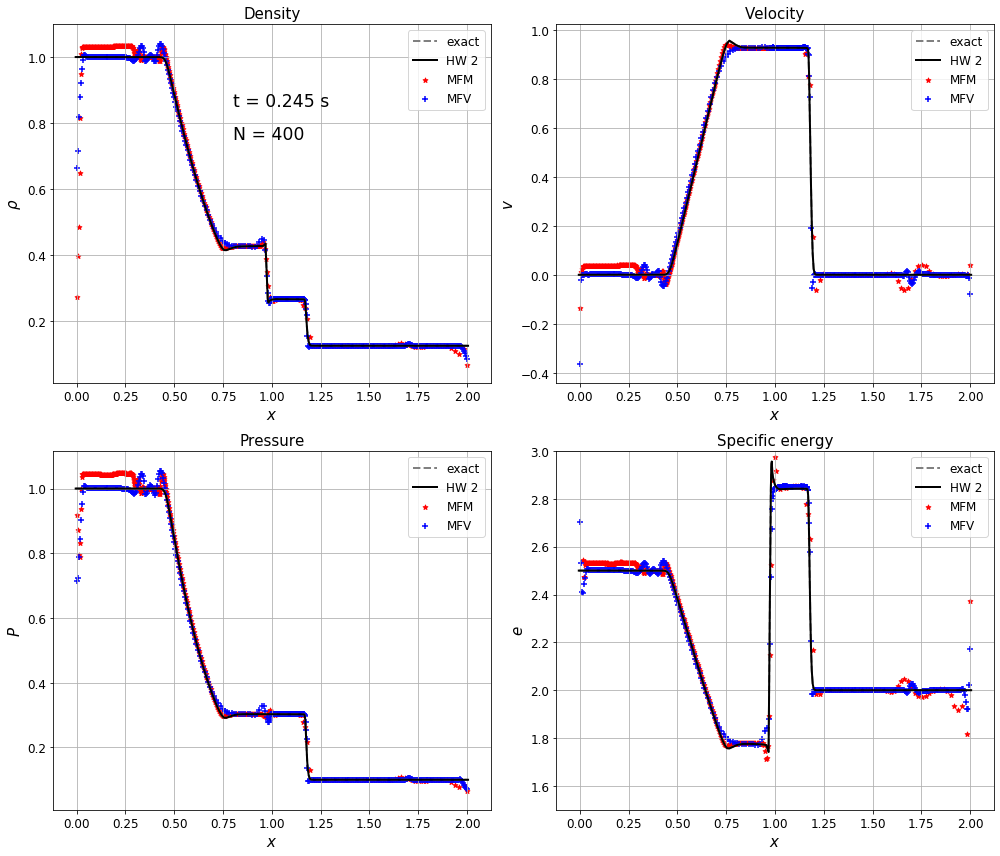

In [7]:
N = 400
i = 49

# MFM at t = 0.245 s.
x, v, rho, p, e, t = get_snapshot_data(basedir_mfm_N400, i)
data_mfm = np.zeros((len(x), 6))
data_mfm[:, 0] = x; data_mfm[:, 1] = rho; data_mfm[:, 2] = v; data_mfm[:, 3] = p
data_mfm[:, 4] = e; data_mfm[0, 5] = t

# MFV at t = 0.245 s.
x, v, rho, p, e, t = get_snapshot_data(basedir_mfv_N400, i)
data_mfv = np.zeros((len(x), 6))
data_mfv[:, 0] = x; data_mfv[:, 1] = rho; data_mfv[:, 2] = v; data_mfv[:, 3] = p
data_mfv[:, 4] = e; data_mfv[0, 5] = t

make_plots(data_mfm, data_mfv, data_N400, data_true, N)

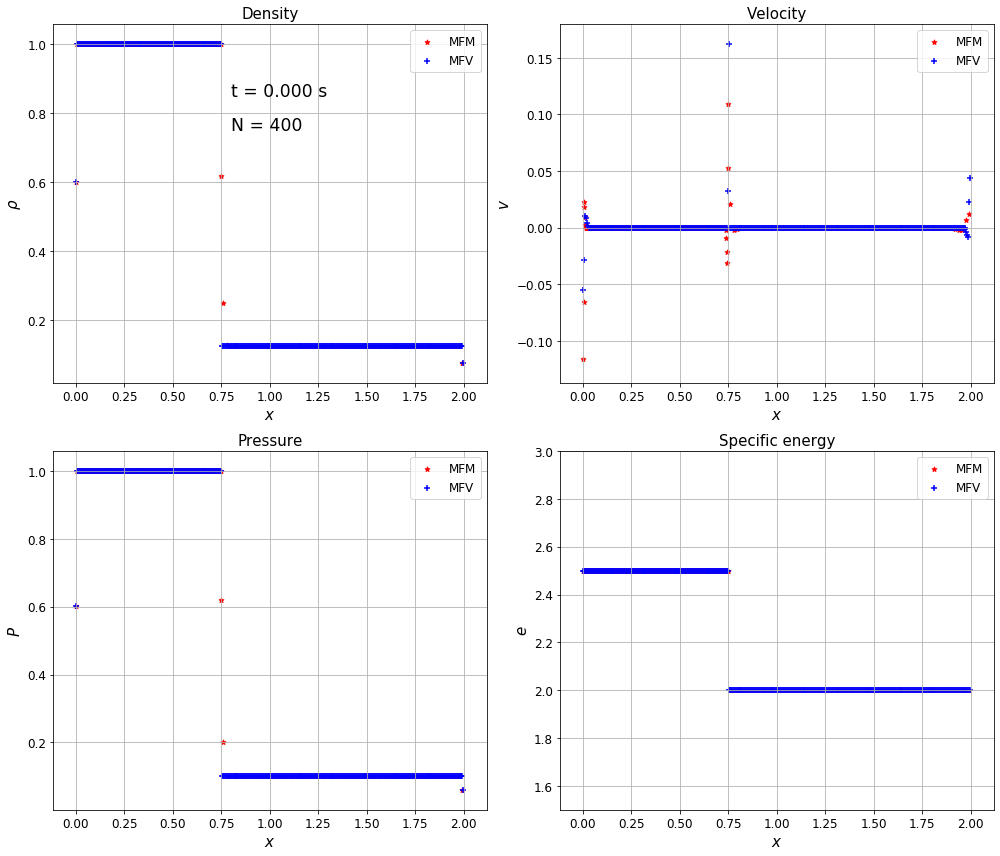

In [8]:
# Check initial conditions.
N = 400
i = 0

# MFM at t = 0.245 s.
x, v, rho, p, e, t = get_snapshot_data(basedir_mfm_N400, i)
data_mfm = np.zeros((len(x), 6))
data_mfm[:, 0] = x; data_mfm[:, 1] = rho; data_mfm[:, 2] = v; data_mfm[:, 3] = p
data_mfm[:, 4] = e; data_mfm[0, 5] = t

# MFV at t = 0.245 s.
x, v, rho, p, e, t = get_snapshot_data(basedir_mfv_N400, i)
data_mfv = np.zeros((len(x), 6))
data_mfv[:, 0] = x; data_mfv[:, 1] = rho; data_mfv[:, 2] = v; data_mfv[:, 3] = p
data_mfv[:, 4] = e; data_mfv[0, 5] = t

make_plots(data_mfm, data_mfv, data_N100, data_true, N)